# Assignment 3 Solutions

## Question 1

A dataset has two variables two classes of data. Class A has mean $(1,0)$ and class B has mean $(-1,0)$. The two classes have identical covariance with covariance matrix $\mathbf{\Sigma} = \begin{pmatrix}0.5 & 0 \\0 & 0.5\end{pmatrix}$

It is initially assumed, based on the number of training samples in each class, that the distribution of data between the two classes is $P(A)=P(B)=0.5$. The LDA decision boundary is then the line $x=0$.

This assumption is later discovered to be incorrect because the sample of the data in the training set did not reflect the true distribution of the data between the classes. The prior probabilities were therefore revised to be $P(A)=0.6$, $P(B)=0.4$. The class means and covariance do not change.

The decision boundary is recomputed. Which two of the following statements are true?

1. The decision boundary move to $x=a$ where $a>0$
2. The decision boundary move to $x=a$ where $a<0$
3. The decision boundary remain at $x=0$
4. The decision boundary becomes quadratic.
5. The decision boundary remains a vertical straight line.

### Solution

First, we reason about this intuitively. Then, we will do the calculation. The following points are important here:

* "*The class means and covariance do not change*". This means that the problem continues to obey LDAs assumptions, and therefore **the boundary remains a vertical straight line** - vertical, because the means are the same; a straight line because the class covariances remain the same.

* The prior knowledge that points in class A are more likely than points in class B means that there is a higher probability of points further away from the mean of class A being classified in that class. The boundary therefore moves *towards class B*, ie to $x=a$ where $a<0$.

Points 1 and 5 are therefore the two true statements. Let us know demonstrate this numerically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Priors
pA = 0.5
pB = 1-pA
# Means
meanA = np.array([[1.0],[0.0]])
meanB = np.array([[-1.0],[0.0]])
# Covariance
Sigma = np.array([[0.5, 0.0], [0.0, 0.5]])
# Discriminant
M = np.matmul(np.linalg.inv(Sigma), meanA - meanB)
c = -0.5 * np.matmul((meanA - meanB).T, np.matmul(np.linalg.inv(Sigma), meanA + meanB)) + np.log(pA/pB)
print(M)
print(c)

[[4.]
 [0.]]
[[0.]]


The decision boundary is at $L(x) = \mathbf{M}^\mathrm{T}\mathbf{x} + c = 0$. We have that $\mathbf{M} = \begin{pmatrix}4 \\ 0\end{pmatrix}$ and $c=0$, and so the boundary is at $4x=0$, or $x=0$, a vertical straight line.

We now change the prior to $P(A)=0.6$ and $P(B)=0.4$. Only the term $c$ needs to be recomputed:

In [2]:
pA = 0.6
pB = 1-pA
c = -0.5 * np.matmul((meanA - meanB).T, np.matmul(np.linalg.inv(Sigma), meanA + meanB)) + np.log(pA/pB)
print(M)
print(c)

[[4.]
 [0.]]
[[0.40546511]]


The decision boundary is therefore now at $4x+0.405=0$, or $x\approx-0.1$.

## Question 2

The diagram below shows the decision boundaries in a three-class (a,b,c) classification problem that we wish to solve using multiclass LDA. The class with the higher probability on each side of the boundary is indicated next to the line.

To which class will a point in each of the regions 1-6 be assigned?

In [3]:
import matplotlib.pyplot as plt
im = plt.imread('multiclassLDA.png')
plt.imshow(im)

### Solution

This is a matter of reading off which side of each of the lines the regions lie:

1. $P(b) > P(a)$, $P(a)>P(c)$, and $P(b)>P(c)$. Therefore, $P(b) > P(a) > P(c)$ so class b.
2. $P(b) > P(c) > P(a)$ so class b.
3. $P(c) > P(b) > P(a)$ so class c.
4. $P(c) > P(a) > P(b)$ so class c.
5. $P(a) > P(c) > P(b)$ so class a.
6. $P(a) > P(b) > P(c)$ so class a.

## Question 3
The data shown in the figure below shows data generated from two processes. The data generating processes are multivariate normal distributions with parameters
* Class A (red): mean $\bar{\mathbf{x}}_\mathrm{A}= \begin{pmatrix}5.0\\3.0\end{pmatrix}$; covariance $\mathbf{\Sigma}_\mathrm{A}=\begin{pmatrix}1.26 & -1.51\\ -1.51 & 3.26\end{pmatrix}$
* Class B (green): mean $\bar{\mathbf{x}}_\mathrm{A}= \begin{pmatrix}-4.0\\-4.0\end{pmatrix}$; covariance $\mathbf{\Sigma}_\mathrm{A}=\begin{pmatrix}6.22 & 0.09\\ 0.09 & 2.91\end{pmatrix}$

The decision rule for quadratic discrimination analyis is given by
\[\mbox{if}\,Q(\bx)>0\,\mbox{assign $\bx$ to class A else class B}\]
where 
* $Q(\mathbf{x}) = \mathbf{x}^\mathrm{T}\mathbf{A}\mathbf{x} + \mathbf{b}^\mathrm{T}\mathbf{x} + c$
* $\mathbf{A} = -\frac{1}{2}\left(\mathbf{\Sigma}_\mathrm{A}^{-1}-\mathbf{\Sigma}_\mathrm{B}^{-1}\right)$
* $\mathbf{b} = \mathbf{\Sigma}^{-1}_\mathrm{A}\bar{\mathbf{x}}_\mathrm{A} - \mathbf{\Sigma}^{-1}_\mathrm{B}\bar{\mathbf{x}}_\mathrm{B}$
* $c = -\frac{1}{2}\left(\log_e\frac{ \left\lvert \mathbf{\Sigma}_\mathrm{A} \right\rvert }{ \left\lvert \mathbf{\Sigma}_\mathrm{B} \right\rvert }+\bar{\mathbf{x}}_\mathrm{A}^\mathrm{T}\mathbf{\Sigma}_\mathrm{A}^{-1}\bar{\mathbf{x}}_\mathrm{A}-\bar{\mathbf{x}}_\mathrm{B}^\mathrm{T}\mathbf{\Sigma}_\mathrm{B}^{-1}\bar{\mathbf{x}}_\mathrm{B}\right)-\log_e\frac{\pi_\mathrm{A}}{\pi_\mathrm{B}}$


Which of the following diagrams best represents the classification boundary?

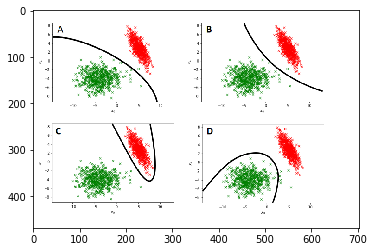

In [4]:
im = plt.imread('boundaries.png')
plt.imshow(im)

In [14]:
import numpy as np

# Define the means
meanA = np.array([5.0, 3.0])
meanB = np.array([-4.0, -4.0])

# Covariances
covA = np.array([[1.26, -1.51], [-1.51, 3.26]])
covB = np.array([[6.22, 0.09], [0.09, 2.91]])

# Priors
pA = 0.5
pB = 1 - pA

# Define the decision rule
icovA = np.linalg.inv(covA)
icovB = np.linalg.inv(covB)
A = -0.5 * (icovA - icovB)
b = np.matmul(icovA, meanA.T) - np.matmul(icovB, meanB.T)


# IMPORTANT: THE SIGN OF THE THIRD TERM IS INCORRECT.
c = -0.5 * (np.log(np.linalg.det(covA)/np.linalg.det(covB))
            + np.matmul(meanA,np.matmul(icovA, meanA.T))
            + np.matmul(meanB,np.matmul(icovB, meanB.T))) - np.log(pA/pB)
           

# Given point x, compute the decision function
Q = lambda x: np.matmul(x, np.matmul(A, x.T)) + np.matmul(b.T, x) + c


Sample the classes to generate some data

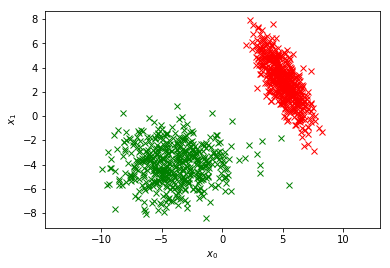

In [15]:
np.random.seed(123)
classA = np.random.multivariate_normal(meanA, covA, 500)
classB = np.random.multivariate_normal(meanB, covB, 500)
plt.plot(classA[:,0], classA[:,1],'rx')
plt.plot(classB[:,0], classB[:,1],'gx')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
axes = plt.gca()
axes.set_xlim([-15,15])
axes.set_ylim([-10,10])
plt.axis('equal')
plt.savefig('trainingdata.png')

Now let's compute the decision rule

(-16.499399028760916,
 16.499404911457354,
 -10.999921291089153,
 10.9987476367619)

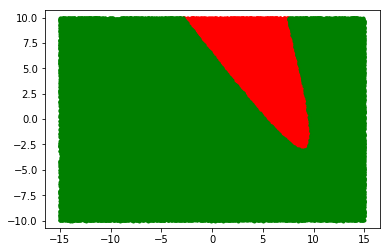

In [16]:
# Generate random points
x = np.random.rand(100000,2)
x[:,0] = x[:,0]*30 - 15
x[:,1] = x[:,1]*20 - 10
# Apply the decision rule
Qx = np.array([ Q(i) for i in x ])
cA = x[Qx>0,:]
cB = x[Qx<0,:]
# Plot the result
plt.plot(cA[:,0], cA[:,1],'r.')
plt.plot(cB[:,0], cB[:,1],'g.')
axes = plt.gca()
axes.set_xlim([-15,15])
axes.set_ylim([-10,10])
plt.axis('equal')